In [1]:
%matplotlib notebook
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, ConfusionMatrixDisplay
import sys
sys.path.append("..")
from data_prep import testing_data_prep
from testing import testing, majority_vote, counts_to_probs_binary
from model import vgg11
from utils import add_value_label

/home/gwb21218/miniconda3/envs/dm2/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/gwb21218/miniconda3/envs/dm2/lib/python3.8/site-packages/requests/__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn(


In [2]:
image_path = "../20220929_dataset_all_classes/"
labels_path = "../20220929_dataset_all_classes/FFc_data_with_G3descs.txt"

In [3]:
test_images, test_labels, sample_labels = testing_data_prep(image_path, labels_path, model_classes="cohesive")

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 15.34it/s]


In [5]:
model = vgg11(model_type="binary")
model.load_state_dict(torch.load("../models/co_final.pth")["model_state_dict"])
model.to("cuda")

VGG(
  (features): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace=True)
    (11): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): ReLU(inplace=True)
    (14): MaxPool2d(ke

In [6]:
preds, probs, correct, total = testing(model, test_images, test_labels)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:05<00:00, 41.34it/s]


In [7]:
maj_preds, maj_counts = majority_vote(preds, 9, return_counts=True)

In [8]:
maj_probs = counts_to_probs_binary(maj_counts, maj_preds)

In [9]:
acc = (correct / total).cpu().numpy().item()
pre = precision_score(test_labels, preds)
rec = recall_score(test_labels, preds)
auc = roc_auc_score(test_labels, probs)
conf_mat = confusion_matrix(test_labels, preds)

In [10]:
acc_maj = (maj_preds == sample_labels).sum() / sample_labels.shape[0]
pre_maj = precision_score(sample_labels, maj_preds)
rec_maj = recall_score(sample_labels, maj_preds)
auc_maj = roc_auc_score(sample_labels, maj_probs[:,1])
conf_mat_maj = confusion_matrix(sample_labels, maj_preds)

<IPython.core.display.Javascript object>


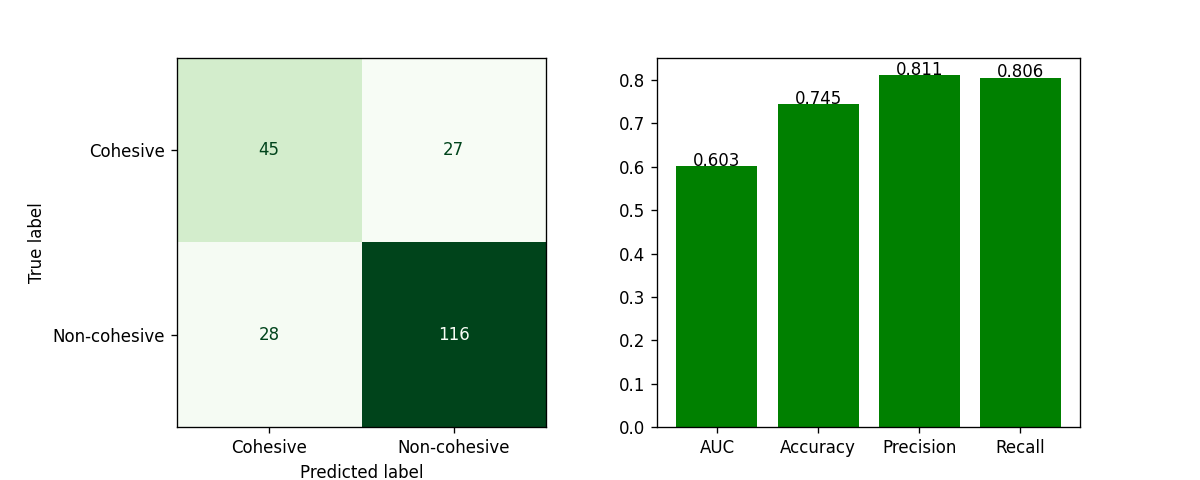

In [11]:
fig, axes = plt.subplot_mosaic("""AB""", figsize=(10,4))

ConfusionMatrixDisplay(conf_mat, display_labels=["Cohesive", "Non-cohesive"]).plot(ax=axes["A"], cmap="Greens", colorbar=False)

axes["B"].bar(["AUC", "Accuracy", "Precision", "Recall"], [auc, acc, pre, rec], color="green")
add_value_label(axes["B"], ["AUC", "Accuracy", "Precision", "Recall"], [np.round(auc, decimals=3), np.round(acc, decimals=3), np.round(pre, decimals=3), np.round(rec, decimals=3)])

<IPython.core.display.Javascript object>


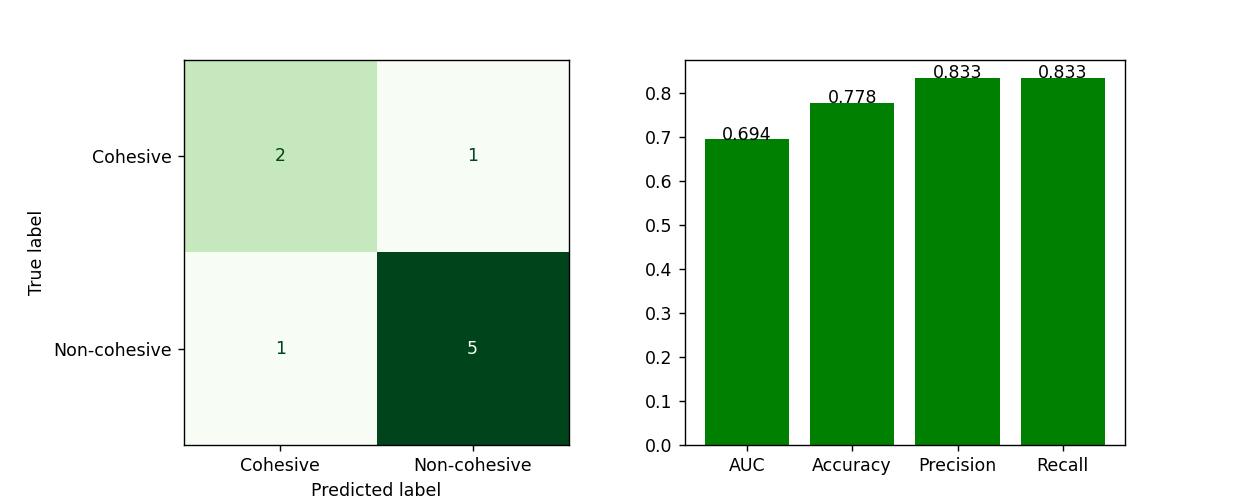

In [25]:
fig, axes = plt.subplot_mosaic("""AB""", figsize=(10,4))

ConfusionMatrixDisplay(conf_mat_maj, display_labels=["Cohesive", "Non-cohesive"]).plot(ax=axes["A"], cmap="Greens", colorbar=False)

axes["B"].bar(["AUC", "Accuracy", "Precision", "Recall"], [auc_maj, acc_maj, pre_maj, rec_maj], color="green")
add_value_label(axes["B"], ["AUC", "Accuracy", "Precision", "Recall"], [np.round(auc_maj, decimals=3), np.round(acc_maj, decimals=3), np.round(pre_maj, decimals=3), np.round(rec_maj, decimals=3)])